<a target="_blank" href="https://colab.research.google.com/github/wbfrench1/stock/blob/main/src/get_stock_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
#from yahoofinance import HistoricalPrices
import json
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


# Plan

1. Graph Historical Performance
   1. Pull one stocks data
   1. Get stock data over a time period
   1. Graph stock price over time period
1. Get S&P500 company info
1. Get multiple ticker price data
1. Get recent adjusted closing price
1.

# 1. Graph Historical Performance

### 1. Pull one stocks data

In [2]:
meta = yf.Ticker("META")
str_period = '5y'
str_interval = '1mo'

### Get Data over a specified period of time and interval

In [3]:
meta.history(period=str_period,
             interval=str_interval).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-03-01 00:00:00-05:00,162.600006,174.300003,159.279999,166.690002,387936100,0.0,0.0
2019-04-01 00:00:00-04:00,167.830002,198.479996,167.279999,193.399994,381985300,0.0,0.0
2019-05-01 00:00:00-04:00,194.779999,196.179993,177.160004,177.470001,286821500,0.0,0.0
2019-06-01 00:00:00-04:00,175.000000,198.880005,160.839996,193.000000,426428600,0.0,0.0
2019-07-01 00:00:00-04:00,195.210007,208.660004,191.929993,194.229996,351020900,0.0,0.0


### Graph stock data over time period

<Axes: xlabel='Date', ylabel='Close'>

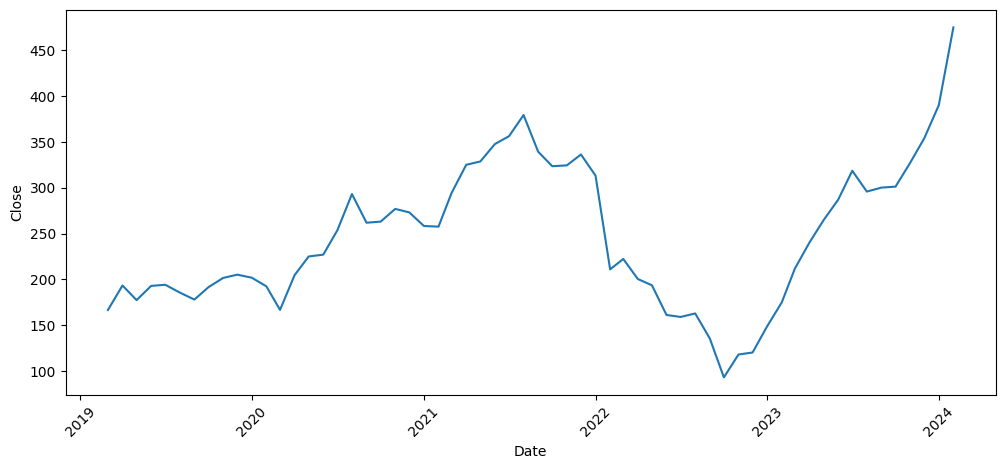

In [4]:
t_figsize = (12,5)
fig, ax = plt.subplots(figsize=t_figsize)
plt.xticks(rotation=45)
sns.lineplot(x= meta.history(period=str_period,
                             interval=str_interval).index,
             y= meta.history(period=str_period,
                             interval=str_interval)['Close'],
             ax= ax)

In [5]:
meta.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-03 00:00:00-05:00,344.980011,347.950012,343.179993,344.470001,15451100,0.0,0.0
2024-01-04 00:00:00-05:00,344.500000,348.149994,343.399994,347.119995,12099900,0.0,0.0
2024-01-05 00:00:00-05:00,346.989990,353.500000,346.260010,351.950012,13920700,0.0,0.0
2024-01-08 00:00:00-05:00,354.700012,358.980011,352.049988,358.660004,13890200,0.0,0.0
2024-01-09 00:00:00-05:00,356.399994,360.640015,355.359985,357.429993,13463900,0.0,0.0
2024-01-10 00:00:00-05:00,360.170013,372.940002,359.079987,370.470001,22117200,0.0,0.0
2024-01-11 00:00:00-05:00,372.130005,372.779999,362.929993,369.670013,17205400,0.0,0.0
2024-01-12 00:00:00-05:00,370.160004,377.059998,369.540009,374.489990,19295700,0.0,0.0
2024-01-16 00:00:00-05:00,373.649994,375.609985,367.230011,367.459991,15306900,0.0,0.0


# Get S&P 500 stock tickers

In [6]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_sp500_co_info = table[0]
df_sp500_co_info.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [7]:
df_sp500_co_info['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

https://www.marketdata.app/how-to-use-the-yahoo-finance-api/

# Get Multiple Ticker Price Data

## Put S&P 500 tickers into a string

In [8]:
# If the below download fails, then it might be because of the replacement of . with -
str_sp500_stk_tkrs= ' '.join(i if '.' not in i else i.replace('.','-') for i in df_sp500_co_info['Symbol'])
print('Number of tickers in sp500:', len(df_sp500_co_info['Symbol']), '\n')
str_sp500_stk_tkrs

Number of tickers in sp500: 503 



'MMM AOS ABT ABBV ACN ADBE AMD AES AFL A APD ABNB AKAM ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AEE AAL AEP AXP AIG AMT AWK AMP AME AMGN APH ADI ANSS AON APA AAPL AMAT APTV ACGL ADM ANET AJG AIZ T ATO ADSK ADP AZO AVB AVY AXON BKR BALL BAC BK BBWI BAX BDX BRK-B BBY BIO TECH BIIB BLK BX BA BKNG BWA BXP BSX BMY AVGO BR BRO BF-B BLDR BG CDNS CZR CPT CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE COR CNC CNP CF CHRW CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CEG COO CPRT GLW CTVA CSGP COST CTRA CCI CSX CMI CVS DHR DRI DVA DAY DE DAL XRAY DVN DXCM FANG DLR DFS DG DLTR D DPZ DOV DOW DHI DTE DUK DD EMN ETN EBAY ECL EIX EW EA ELV LLY EMR ENPH ETR EOG EPAM EQT EFX EQIX EQR ESS EL ETSY EG EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FICO FAST FRT FDX FIS FITB FSLR FE FI FLT FMC F FTNT FTV FOXA FOX BEN FCX GRMN IT GEHC GEN GNRC GD GE GIS GM GPC GILD GPN GL GS HAL HIG HAS HCA PEAK HSIC HSY HES HPE HLT HOLX HD HON HRL HST HWM HPQ HUBB

## Query Multiple Tickers on yahoo finance

In [9]:
str_today = datetime.today().strftime("%Y-%m-%d")

In [10]:
data = yf.download(str_sp500_stk_tkrs, start="2018-01-01", end=str_today)

[*********************100%%**********************]  503 of 503 completed


In [11]:
print('data.shape:', data.shape)
data.tail(5)

data.shape: (1532, 3018)


Price        Adj Close                                                         \
Ticker               A    AAL        AAPL        ABBV        ABNB         ABT   
Date                                                                            
2024-01-29  132.830002  14.94  191.729996  163.910004  152.699997  113.449997   
2024-01-30  134.279999  14.53  188.039993  164.919998  149.440002  113.480003   
2024-01-31  130.100006  14.23  184.399994  164.399994  144.139999  113.150002   
2024-02-01  133.050003  14.34  186.860001  167.589996  146.490005  114.489998   
2024-02-02  132.970001  14.56  185.850006  168.669998  146.550003  112.110001   

Price                                                      ...   Volume  \
Ticker           ACGL         ACN        ADBE         ADI  ...     WYNN   
Date                                                       ...            
2024-01-29  79.730003  373.350006  630.229980  197.199997  ...  1261800   
2024-01-30  80.580002  371.299988  627.960022  194.740005  ...  1388400   
2024-01-31  82.430000  363.880005  617.780029  192.360001  ...  1583000   
2024-02-01  82.089996  370.910004  627.909973  192.009995  ...  1942200   
2024-02-02  83.300003  372.950012  634.760010  192.100006  ...  1225200   

Price                                                                       \
Ticker           XEL       XOM     XRAY      XYL      YUM      ZBH    ZBRA   
Date                                                                         
2024-01-29   4798800  18317500  1841400  1308100  1482100  1261100  493200   
2024-01-30   3782900  19610900  1134000   960800  1421500  1448600  302100   
2024-01-31  13842700  22415300  1910800  1304800  2154200  2460100  482600   
2024-02-01   5303200  19240700  5492200  1113000  1440700  1434500  474100   
2024-02-02   3901800  21968200  7922600  1642500  1823800  1058500  418600   

Price                         
Ticker         ZION      ZTS  
Date                          
2024-01-29  2051600  1669900  
2024-01-30  1918900  1607500  
2024-01-31  4657400  2150000  
2024-02-01  8305100  1584200  
2024-02-02  6329600  1177700  

[5 rows x 3018 columns]

In [12]:
# convert the index to datetime
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02'],
              dtype='datetime64[ns]', name='Date', length=1532, freq=None)

In [13]:
#Get today's Date - time stamp closest day
ts_clst_day = data.index[data.index.get_indexer([datetime.today()], method='nearest')]
ts_clst_day

DatetimeIndex(['2024-02-02'], dtype='datetime64[ns]', name='Date', freq=None)

# Create Min/Max Current DataFrame

## Get Adjusted Closing Price

In [27]:
# gets most recent stock price close for each S&P 500 stock
# transforms from a row into a column
df_cur_stkpr1 = data.loc[ts_clst_day, 'Adj Close'].stack().loc[ts_clst_day,:].copy()
df_cur_stkpr1

Date        Ticker
2024-02-02  A         132.970001
            AAL        14.560000
            AAPL      185.850006
            ABBV      168.669998
            ABNB      146.550003
                         ...    
            YUM       128.750000
            ZBH       126.320000
            ZBRA      246.479996
            ZION       39.650002
            ZTS       189.039993
Length: 503, dtype: float64

In [33]:
# create a dataframe of current stock prices with stock tickers as the index
df_cur_stkpr1 = df_cur_stkpr.loc[ts_clst_day].reset_index().drop(columns='Date').set_index('Ticker')
df_cur_stkpr1
#df_cur_stkpr.loc['2023-07-07']
#ts_clst_day[0].strftime('YYYY-MM-DD')

,0
Ticker,
A,132.970001
AAL,14.560000
AAPL,185.850006
ABBV,168.669998
ABNB,146.550003
...,...
YUM,128.750000
ZBH,126.320000
ZBRA,246.479996


In [35]:
df_cur_stkpr1 = pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})
df_cur_stkpr1

,Cur_StkPr
Ticker,
A,132.970001
AAL,14.560000
AAPL,185.850006
ABBV,168.669998
ABNB,146.550003
...,...
YUM,128.750000
ZBH,126.320000
ZBRA,246.479996


## Transform dataframe

In [18]:
# more the date into the columns
df = data.copy()
df.reset_index(inplace=True)
df.head()

Price        Date  Adj Close                                                   \
Ticker                     A        AAL       AAPL       ABBV ABNB        ABT   
0      2018-01-02  64.625557  51.647560  40.722874  74.280708  NaN  52.831726   
1      2018-01-03  66.269859  51.014027  40.715782  75.443100  NaN  52.948551   
2      2018-01-04  65.772781  51.335663  40.904903  75.012840  NaN  52.858685   
3      2018-01-05  66.824371  51.316174  41.370621  76.318665  NaN  53.011459   
4      2018-01-08  66.967773  50.809345  41.216957  75.095879  NaN  52.858685   

Price                                      ...   Volume                     \
Ticker       ACGL         ACN        ADBE  ...     WYNN      XEL       XOM   
0       29.433332  140.376007  177.699997  ...  2581200  2443400  11469300   
1       29.459999  141.023895  181.039993  ...  3530900  4114900  13957700   
2       29.570000  142.693756  183.220001  ...  2708800  2807000  10863000   
3       29.453333  143.870880  185.339996  ...  2186600  3728000  11047600   
4       29.456667  145.020554  185.039993  ...  1803800  3837600  10927100   

Price                                                                
Ticker     XRAY     XYL      YUM      ZBH    ZBRA     ZION      ZTS  
0       1622300  877800  1747800  1818259  310600  2387100  2135600  
1       1533300  778800  2554900  1368664  253000  1575700  2328200  
2       1052400  796500  1971200  1105396  435200  3309200  2534000  
3       1329000  666800  1927100  1095302  301800  1212200  2166100  
4       1188500  554700  1599400  1286985  218600  1697700  3631400  

[5 rows x 3019 columns]

### Convert multi-col index to single-col index

In [19]:
df1 = df.copy()
df1.columns = [' '.join((col[0].replace(' ',''),col[1])).strip() for col in df1.columns.values]
df1.head(1)

,Date,AdjClose A,AdjClose AAL,AdjClose AAPL,AdjClose ABBV,AdjClose ABNB,AdjClose ABT,AdjClose ACGL,AdjClose ACN,AdjClose ADBE,...,Volume WYNN,Volume XEL,Volume XOM,Volume XRAY,Volume XYL,Volume YUM,Volume ZBH,Volume ZBRA,Volume ZION,Volume ZTS
0,2018-01-02,64.625557,51.64756,40.722874,74.280708,NaN,52.831726,29.433332,140.376007,177.699997,...,2581200,2443400,11469300,1622300,877800,1747800,1818259,310600,2387100,2135600


### Convert multiple close-type/stock to 2 cols

In [20]:
df2 = df1.melt(id_vars=['Date'], value_vars=df1.columns[1:],).copy()

In [21]:
df2['Value_Type'] =  df2['variable'].str.split(' ').str[0]
df2['Stock_Tkr'] =  df2['variable'].str.split(' ').str[1]
df2.drop(columns=['variable'], inplace=True)
df2 = df2[['Date', 'Value_Type', 'Stock_Tkr', 'value']].copy()
df2.head()

,Date,Value_Type,Stock_Tkr,value
0,2018-01-02,AdjClose,A,64.625557
1,2018-01-03,AdjClose,A,66.269859
2,2018-01-04,AdjClose,A,65.772781
3,2018-01-05,AdjClose,A,66.824371
4,2018-01-08,AdjClose,A,66.967773


In [22]:
# demo conversion of tidy data to user friendly format
df2.loc[df2['Value_Type'] == 'AdjClose'].pivot_table(index='Date',
                                                     columns='Stock_Tkr',
                                                     values='value',
                                                     aggfunc=np.sum)

Stock_Tkr,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,64.625557,51.647560,40.722874,74.280708,0.000000,52.831726,29.433332,140.376007,177.699997,80.471344,...,153.529221,40.135128,63.220604,63.125923,63.285549,73.298286,114.987968,103.709999,42.113937,68.807137
2018-01-03,66.269859,51.014027,40.715782,75.443100,0.000000,52.948551,29.459999,141.023895,181.039993,81.469681,...,151.865906,39.866508,64.462250,62.909695,64.057213,73.235413,115.785072,105.769997,42.064106,69.123512
2018-01-04,65.772781,51.335663,40.904903,75.012840,0.000000,52.858685,29.570000,142.693756,183.220001,81.380569,...,152.688202,39.555908,64.551491,62.900272,64.484863,73.980980,115.618233,107.860001,42.238541,69.535774
2018-01-05,66.824371,51.316174,41.370621,76.318665,0.000000,53.011459,29.453333,143.870880,185.339996,81.710320,...,153.706772,39.278873,64.499428,63.784061,64.364014,74.412117,116.767548,109.540001,42.255154,70.331490
2018-01-08,66.967773,50.809345,41.216957,75.095879,0.000000,52.858685,29.456667,145.020554,185.039993,81.852966,...,151.660339,39.572681,64.789413,64.216560,64.596451,74.537888,116.990005,110.629997,42.047493,71.175148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,132.830002,14.940000,191.729996,163.910004,152.699997,113.449997,79.730003,373.350006,630.229980,197.199997,...,97.059998,59.660000,103.129997,35.419998,113.360001,130.550003,122.919998,255.929993,44.930000,192.759995
2024-01-30,134.279999,14.530000,188.039993,164.919998,149.440002,113.480003,80.580002,371.299988,627.960022,194.740005,...,94.989998,59.759998,104.849998,35.029999,113.750000,130.619995,122.370003,250.910004,44.439999,191.429993
2024-01-31,130.100006,14.230000,184.399994,164.399994,144.139999,113.150002,82.430000,363.880005,617.780029,192.360001,...,94.430000,59.869999,102.809998,34.750000,112.440002,129.490005,125.599998,239.550003,41.900002,187.809998


In [23]:
# review old data format
df.head(1)

Price        Date  Adj Close                                                  \
Ticker                     A       AAL       AAPL       ABBV ABNB        ABT   
0      2018-01-02  64.625557  51.64756  40.722874  74.280708  NaN  52.831726   

Price                                      ...   Volume                     \
Ticker       ACGL         ACN        ADBE  ...     WYNN      XEL       XOM   
0       29.433332  140.376007  177.699997  ...  2581200  2443400  11469300   

Price                                                                
Ticker     XRAY     XYL      YUM      ZBH    ZBRA     ZION      ZTS  
0       1622300  877800  1747800  1818259  310600  2387100  2135600  

[1 rows x 3019 columns]

In [24]:
df.loc[df['Date'] == '2020-05-15']

Price        Date  Adj Close                                              \
Ticker                     A   AAL       AAPL       ABBV ABNB        ABT   
596    2020-05-15  79.597031  9.04  75.326447  77.310257  NaN  84.333389   

Price                                  ...   Volume                     \
Ticker   ACGL         ACN        ADBE  ...     WYNN      XEL       XOM   
596     22.98  174.421616  365.299988  ...  3885000  5744300  22445600   

Price                                                               
Ticker     XRAY     XYL      YUM     ZBH    ZBRA     ZION      ZTS  
596     5570700  985200  3998200  881371  383100  2205200  2921700  

[1 rows x 3019 columns]

## Create the Min/Max Dataframe

In [25]:
# Find min/max value index to facilitate getting the date of the min/max
pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmin().values]),
             columns=['5Yr_StkPr_Low_Date'], index=data['Adj Close'].columns)

,5Yr_StkPr_Low_Date
Ticker,
A,2018-06-27
AAL,2020-05-15
AAPL,2019-01-03
ABBV,2019-08-15
ABNB,2022-12-28
...,...
YUM,2020-03-23
ZBH,2020-03-18
ZBRA,2018-01-02


In [36]:
# Show period low, high, current
df_min_max = pd.concat([pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmin().values]),
             columns=['5Yr_StkPr_Low_Date'], index=data['Adj Close'].columns),
                        pd.DataFrame(data['Adj Close'].min(),
                        columns=['5Yr_StkPr_Low']
                        ),
                        pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmax().values]),
                                     columns=['5Yr_StkPr_High_Date'],
                                     index=data['Adj Close'].columns),
                        pd.DataFrame(data['Adj Close'].max(),
                                     columns=['5Yr_StkPr_High']),
                        pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})], axis=1)
df_min_max.head()

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr
Ticker,,,,,
A,2018-06-27,58.580288,2021-09-03,176.371185,132.970001
AAL,2020-05-15,9.040000,2018-01-12,56.988728,14.560000
AAPL,2019-01-03,34.118877,2023-12-14,198.110001,185.850006
ABBV,2019-08-15,51.432796,2024-02-02,168.669998,168.669998
ABNB,2022-12-28,82.489998,2021-02-11,216.839996,146.550003


## Add Company Names

In [37]:
df_min_max_cur= df_min_max.merge(df_sp500_co_info[['Symbol',
                                               'Security']],
                             how='left', left_index= True,
                             right_on='Symbol').copy()
df_min_max_cur.head()

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Symbol,Security
9.0,2018-06-27,58.580288,2021-09-03,176.371185,132.970001,A,Agilent Technologies
25.0,2020-05-15,9.040000,2018-01-12,56.988728,14.560000,AAL,American Airlines Group
39.0,2019-01-03,34.118877,2023-12-14,198.110001,185.850006,AAPL,Apple Inc.
3.0,2019-08-15,51.432796,2024-02-02,168.669998,168.669998,ABBV,AbbVie
11.0,2022-12-28,82.489998,2021-02-11,216.839996,146.550003,ABNB,Airbnb


In [38]:
df_min_max_cur = df_min_max_cur.reset_index().drop(columns='index').copy()
df_min_max_cur

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Symbol,Security
0,2018-06-27,58.580288,2021-09-03,176.371185,132.970001,A,Agilent Technologies
1,2020-05-15,9.040000,2018-01-12,56.988728,14.560000,AAL,American Airlines Group
2,2019-01-03,34.118877,2023-12-14,198.110001,185.850006,AAPL,Apple Inc.
3,2019-08-15,51.432796,2024-02-02,168.669998,168.669998,ABBV,AbbVie
4,2022-12-28,82.489998,2021-02-11,216.839996,146.550003,ABNB,Airbnb
...,...,...,...,...,...,...,...
498,2020-03-23,52.757393,2023-05-02,140.906509,128.750000,YUM,Yum! Brands
499,2020-03-18,75.934509,2021-04-29,169.807602,126.320000,ZBH,Zimmer Biomet
500,2018-01-02,103.709999,2021-12-10,614.549988,246.479996,ZBRA,Zebra Technologies
501,2023-05-04,19.128550,2022-02-15,68.870667,39.650002,ZION,Zions Bancorporation


In [39]:
df_min_max_cur= df_min_max_cur[['Symbol', 'Security', '5Yr_StkPr_Low_Date',
                                '5Yr_StkPr_Low', '5Yr_StkPr_High_Date',
                                '5Yr_StkPr_High', 'Cur_StkPr']].copy()

# Find % Decline from High

In [40]:
df_min_max_cur['Pct_Chg_f_High'] = ((df_min_max_cur['Cur_StkPr']
                                    - df_min_max_cur['5Yr_StkPr_High']
                                    )
                                     /df_min_max_cur['5Yr_StkPr_High']
                                    )
df_min_max_cur

,Symbol,Security,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
0,A,Agilent Technologies,2018-06-27,58.580288,2021-09-03,176.371185,132.970001,-0.246079
1,AAL,American Airlines Group,2020-05-15,9.040000,2018-01-12,56.988728,14.560000,-0.744511
2,AAPL,Apple Inc.,2019-01-03,34.118877,2023-12-14,198.110001,185.850006,-0.061885
3,ABBV,AbbVie,2019-08-15,51.432796,2024-02-02,168.669998,168.669998,0.000000
4,ABNB,Airbnb,2022-12-28,82.489998,2021-02-11,216.839996,146.550003,-0.324156
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,2020-03-23,52.757393,2023-05-02,140.906509,128.750000,-0.086274
499,ZBH,Zimmer Biomet,2020-03-18,75.934509,2021-04-29,169.807602,126.320000,-0.256099
500,ZBRA,Zebra Technologies,2018-01-02,103.709999,2021-12-10,614.549988,246.479996,-0.598926
501,ZION,Zions Bancorporation,2023-05-04,19.128550,2022-02-15,68.870667,39.650002,-0.424283


In [41]:
threshold = -.5

In [42]:
# try to add the dates that the low and high prices were reached
print(df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].shape, '\n')
df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].sort_values(by='Pct_Chg_f_High')

(47, 8) 



,Symbol,Security,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
479,WBD,Warner Bros. Discovery,2022-12-28,8.870000,2021-03-19,77.269997,10.250000,-0.867348
358,PARA,Paramount Global,2020-03-23,10.111642,2021-03-22,92.501686,14.430000,-0.844003
465,VFC,VF Corporation,2023-11-01,13.035220,2020-01-02,86.245453,16.670000,-0.806714
318,MRNA,Moderna,2019-08-05,12.260000,2021-08-09,484.470001,97.500000,-0.798749
388,PYPL,PayPal,2023-10-27,50.389999,2021-07-23,308.529999,62.419998,-0.797686
325,MTCH,Match Group,2023-11-06,28.450001,2021-10-21,175.529999,37.419998,-0.786817
206,GNRC,Generac,2018-03-01,43.340000,2021-11-01,505.799988,116.139999,-0.770384
84,CCL,Carnival,2022-10-10,6.380000,2018-01-29,66.217567,16.440001,-0.751728
170,ETSY,Etsy,2018-02-08,17.730000,2021-11-24,296.910004,75.699997,-0.745041
1,AAL,American Airlines Group,2020-05-15,9.040000,2018-01-12,56.988728,14.560000,-0.744511


In [43]:
df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].sort_values(by='5Yr_StkPr_Low_Date')

,Symbol,Security,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
500,ZBRA,Zebra Technologies,2018-01-02,103.709999,2021-12-10,614.549988,246.479996,-0.598926
359,PAYC,Paycom,2018-01-02,80.056549,2021-11-02,550.592773,194.990005,-0.645854
432,TECH,Bio-Techne,2018-01-02,31.880123,2021-09-24,133.571915,65.980003,-0.506034
160,ENPH,Enphase,2018-01-18,1.940000,2022-12-02,336.000000,101.760002,-0.697143
170,ETSY,Etsy,2018-02-08,17.730000,2021-11-24,296.910004,75.699997,-0.745041
114,CRL,Charles River Laboratories,2018-02-08,98.190002,2021-09-24,458.299988,218.169998,-0.523958
162,EPAM,EPAM Systems,2018-02-09,104.870003,2021-11-08,717.489990,290.320007,-0.595367
206,GNRC,Generac,2018-03-01,43.340000,2021-11-01,505.799988,116.139999,-0.770384
93,CHTR,Charter Communications,2018-05-31,261.040009,2021-09-02,821.010010,319.209991,-0.611198
332,NEM,Newmont,2018-09-11,24.676889,2022-04-18,79.420692,34.410000,-0.566738
